In [11]:
import pandas as pd
from IPython.core.display import HTML
from IPython.core.display import Image 
%load_ext music21.ipython21.ipExtension
import numpy as np
import music21 as mu
import pymongo
%pylab inline
from pymongo import MongoClient
from bs4 import BeautifulSoup
import re
import pydash as py_
pd.set_option('display.mpl_style', 'default')
plt.rcParams['figure.figsize'] = (15, 5)
import math
import music21 as mu
from functools import partial

# This is necessary to show lots of columns in pandas 0.12. 
# Not necessary in pandas 0.13.
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60)


The music21.ipython21.ipExtension extension is already loaded. To reload it, use:
  %reload_ext music21.ipython21.ipExtension
Populating the interactive namespace from numpy and matplotlib


In [12]:
muAutumnLeaves = mu.converter.parse('FinalDataSet/XMLFiles/JazzSolos/KJAutumnLeaves1996_1371_192.xml')
muStellaByStarlight = mu.converter.parse('FinalDataSet/XMLFiles/JazzSolos/KJStellaByStarlight1983_1534_161.xml')
muGroovinHigh = mu.converter.parse('FinalDataSet/XMLFiles/JazzSolos/KJGroovinHigh1999_1996_290.xml')
muAllTheThingsYouAre = mu.converter.parse('FinalDataSet/XMLFiles/JazzSolos/KJAllTheThingsYouAre1983_2143_290.xml')
muIfIWereABell = mu.converter.parse('FinalDataSet/XMLFiles/JazzSolos/KJIfIWereABell2002_2161_227.xml')

<h2>Data Preparation</h2>

In [13]:
df = pd.read_pickle('data_set_as_pk.pkl')

<h4><a id="microphrase">Harmony and Rhythm</a></h4>

<div>We have not looked at harmony at all until now, regardless of underlying harmony notes operate in similar ways, there does emerge Contours, similiarieis, repeition of partial. But what about about harmony? Place voice leading at the forefront There are patterns that emerge both in the sequence of chords and the types of chords that can be seen. just using basic chords here. Intereesting questions about idiomatic devices</div>

<div>In the following section we will look at note choice, but also voice leading, do major sevenths lead roots, what is happening</div>

<div>First to notice is that chords have structre - below shows the distribution of differnt chords used. So it doesn't seem the the case more of a particular type of chord, but this music practice chaaracterised by distribution....</div>

In [14]:
def getNextChord(data_row):
    veryNextChord = None
    if data_row['nextTenChordTypes']:
        veryNextChord = data_row['nextTenChordTypes'][0:1][0]
    return veryNextChord

def getNextChordBass(data_row):
    veryNextChordRoot = None
    currentChordRoot = None
    if data_row['nextTenChords']:
        veryNextChordRoot = data_row['nextTenChords'][0:1]
        currentChordRoot = data_row['chordRootAsInt']
        veryNextChordRoot = veryNextChordRoot[0] - currentChordRoot
        if veryNextChordRoot < 0:
            veryNextChordRoot = veryNextChordRoot + 12
        #veryNextChordRoot = abs(veryNextChordRoot %12)
        
    return veryNextChordRoot
    
#chords = df[df['chordTypeDisplay'] == 'dom7']

df['veryNextChordType'] = df.apply(getNextChord, axis=1)
df['veryNextChordRootAsInt'] = df.apply(getNextChordBass, axis=1)

<div> So for these examples, what is the harmony?Major sevents and dominant sevenths are used very heavily and this makes intuitive sense</div>

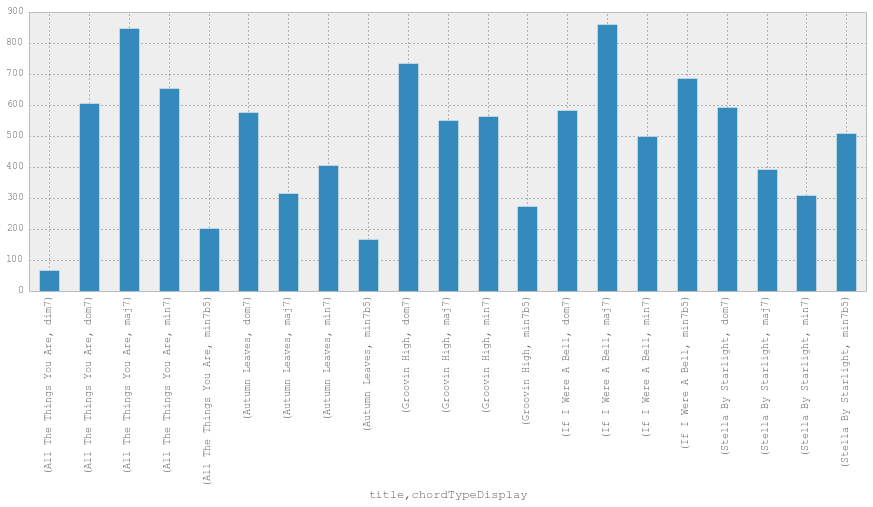

In [15]:
df.groupby(['title', 'chordTypeDisplay'])['chordTypeDisplay'].count().plot(kind="bar")

<div>Two interesting questions emerge, one is note choice - her questions kinds of notes are played over a dominant sevent chord. What about a major seventh chord. Are some notes more common that others. How often is a major seventh chord. THere are lots o guidelines but what are they There is a tendency. We can talk about rhythm also, do certain notes occcur at certain times. Major seventh played off the beat on the dominant chord. Prior, generally, leaving all esle aside,  </div>
<div>
another questions is about sequences in chords, chord progressions. Are there relationships between chords and other chords
</div>

<div> An initial question to ask is about note harmonic relationship</div>

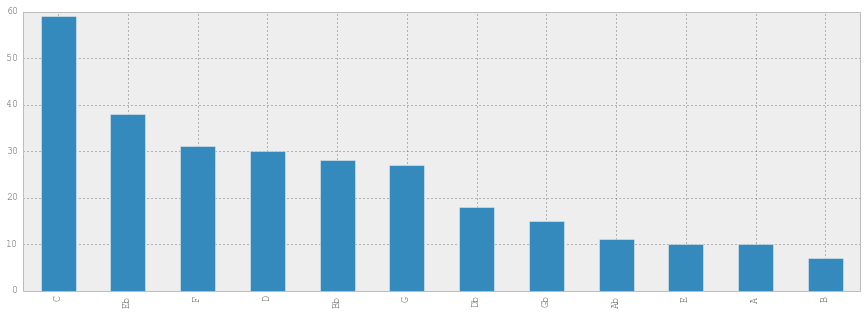

In [16]:
df[df['chordDisplayName'] == 'C min7b5']['normalisedFrequenciesNoOctave'].value_counts()[1:].plot(kind="bar")

<div>THen chords in depth with degrees. The first thing to notice is that there appears to be some kind of relatinoship from all notes to the harmony, but different intensities. Consider the above minor seventh flat five and the below major chord </div>

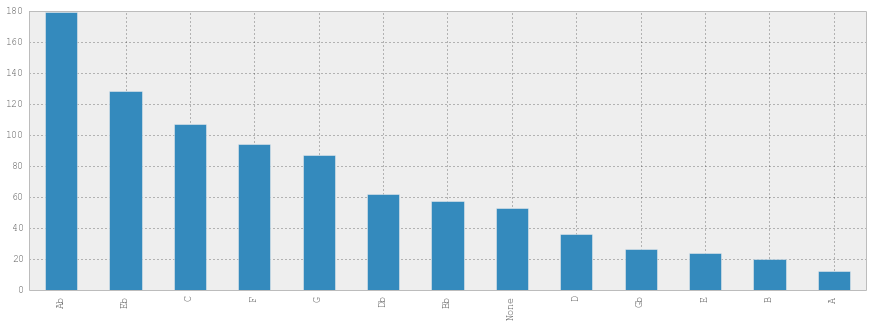

In [17]:
df[df['chordDisplayName'] == 'Ab maj7']['normalisedFrequenciesNoOctave'].value_counts().plot(kind="bar")

<div>So harmony has come kind of meaning above shows that there harmony has meaning here. A c minor7 b5 chord has certain notes. There are some interesting things, keith jarrett uses major ninth. A major chord has notes. But in both cases, all notes are in play</div>

<div>What types of chords are here. problematic to use chord extensions as the notes played and subsitution will bear that out. below hows over all, which chords are in play. Across the entire corpus there are different used chords. The diminised is very rare </div>

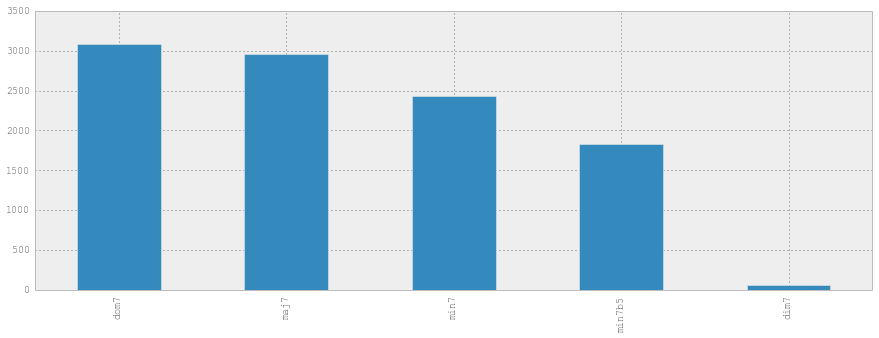

In [18]:
df['chordTypeDisplay'].value_counts().plot(kind="bar")

<div>. As a preliminary, what about the progressions, Other thing to check out is progressions - movement between chords - overwhemingly through cycle of fourths. Taking into count, the next chord, what is happening</div>

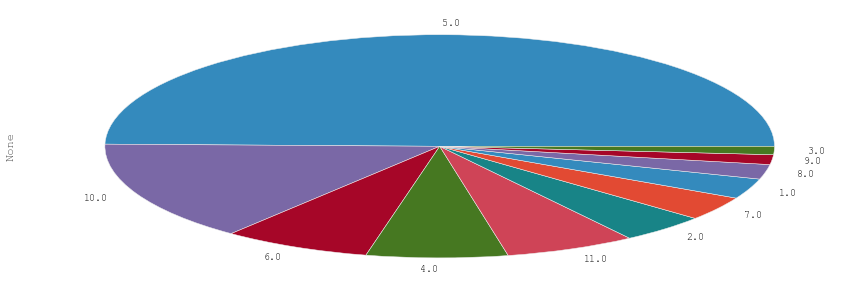

In [19]:
df['veryNextChordRootAsInt'].value_counts().plot(kind="pie")

<div>Immedietel question, is what type of degrees are used. THis again is iutivive, relathioship between cycle of fourths, cadence material</div>
<div>THe data allows a far more granular approach, how chords are moving</div>

In [20]:
df.groupby(['chordTypeDisplay','veryNextChordType','veryNextChordRootAsInt'])['chordDisplayName'].count()

chordTypeDisplay  veryNextChordType  veryNextChordRootAsInt
dim7              min7               11                          67
dom7              maj7               1                          137
                                     2                          146
                                     5                          863
                                     10                          38
                  min7               3                           50
                                     4                           80
                                     5                         1198
                                     6                           62
                                     7                           72
                                     9                           70
                                     10                         267
                  min7b5             5                          104
maj7              dom7               5                  

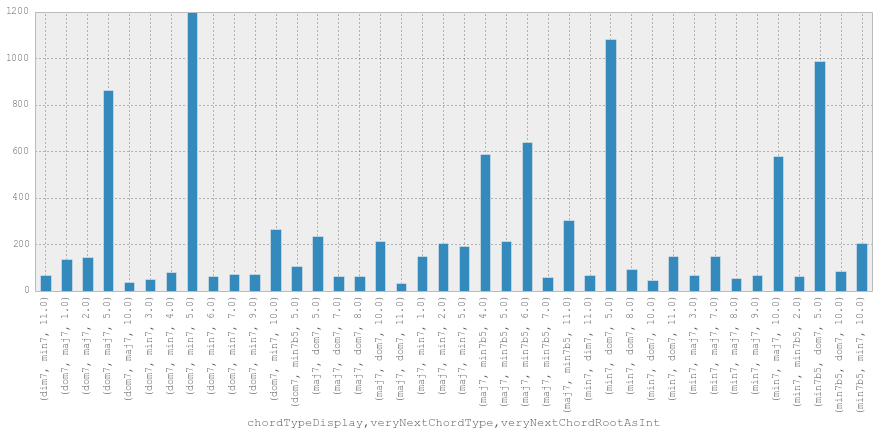

In [21]:
df.groupby(['chordTypeDisplay','veryNextChordType','veryNextChordRootAsInt'])['chordDisplayName'].count().plot(kind="bar")

<div>So above we see pathways spike moving in fourths</div>

<div>Returning to note degrees, are played, it is possible to look at the roots, broadly stepping back finds some trends, that regarldess of song, jarrett uses root heavily. </div>

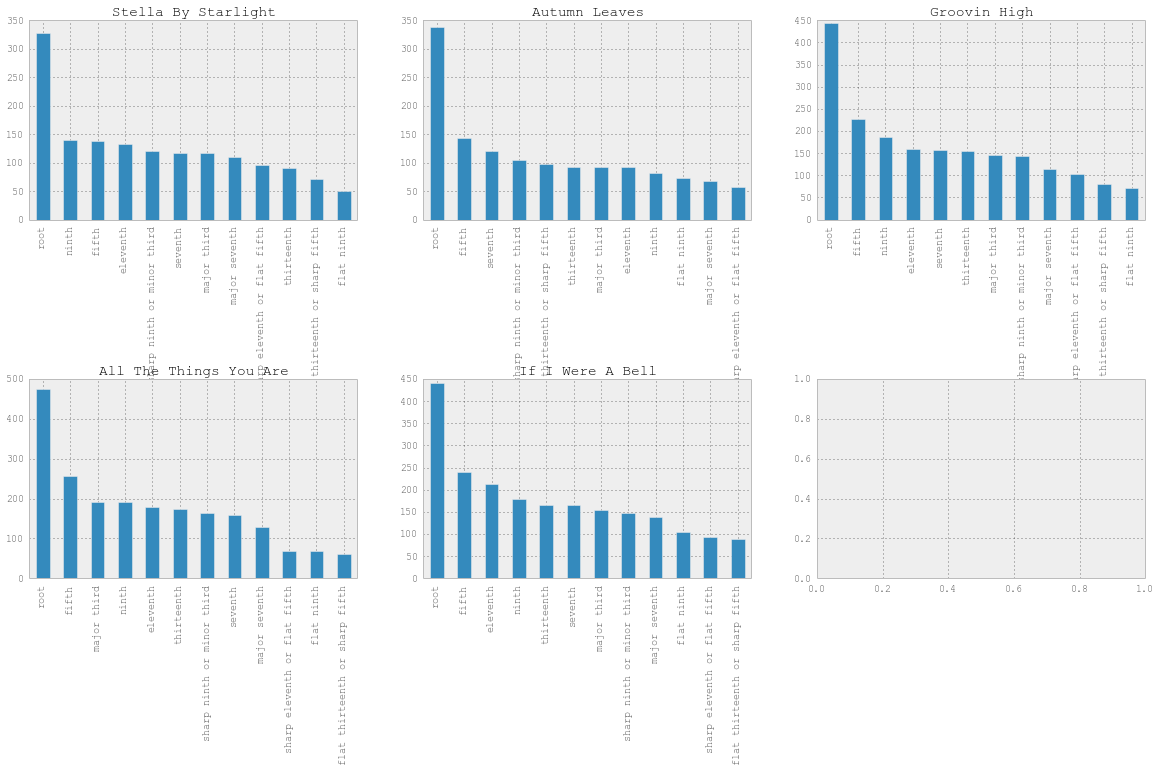

In [22]:
fig, axes = plt.subplots(nrows=2,ncols=3)

df[df['title'] == 'Stella By Starlight']['harmonicFunctionOfNote'].value_counts().plot(kind="bar", ax=axes[0,0], figsize=(20, 10), title='Stella By Starlight')
df[df['title'] == 'Autumn Leaves']['harmonicFunctionOfNote'].value_counts().plot(kind="bar", ax=axes[0,1], figsize=(20, 10), title='Autumn Leaves')
df[df['title'] == 'Groovin High']['harmonicFunctionOfNote'].value_counts().plot(kind="bar", ax=axes[0,2], figsize=(20, 10), title='Groovin High')
df[df['title'] == 'All The Things You Are']['harmonicFunctionOfNote'].value_counts().plot(kind="bar", ax=axes[1,0], figsize=(20, 10), title='All The Things You Are')
df[df['title'] == 'If I Were A Bell']['harmonicFunctionOfNote'].value_counts().plot(kind="bar", ax=axes[1,1], figsize=(20, 10), title='If I Were A Bell')
subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.8)

left  = 0.125  # the left side of the subplots of the figure
right = 0.9    # the right side of the subplots of the figure
bottom = 0.3   # the bottom of the subplots of the figure
top = 2      # the top of the subplots of the figure
wspace = 0.2   # the amount of width reserved for blank space between subplots
hspace = 2   # the amount of height reserved for white space between subplots

<div>Above shows the flattended fith is not as important typcial jazz. But in corea if functions differently</div>

<div>So that is some general remarks, but what about looking more closely at particular chord types. One thing to do is look at Dominant chords. But to look at dominant chords, how does note choice behave in terms of harmony. We know melodically there is a preference for small leaps, but harmonically how do things behave</div>

<div>Again with dom, heavy use of the root note. So how exactly is the root note used in Jarrett's solos</div>

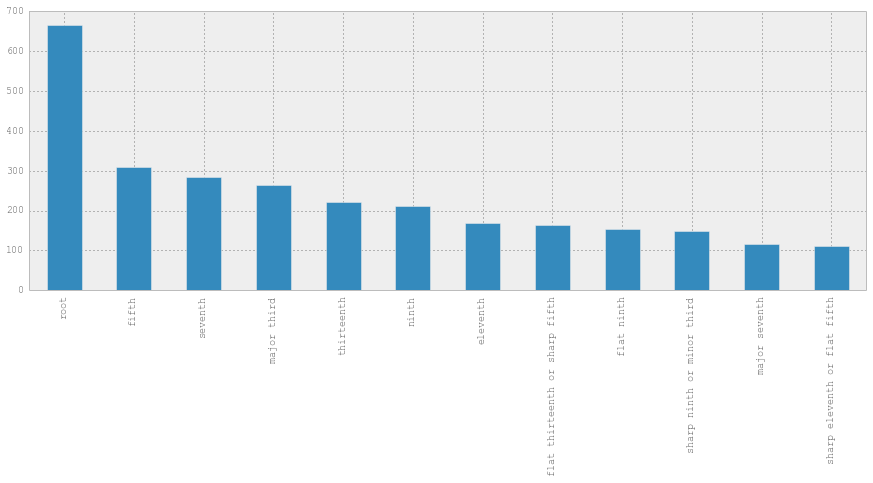

In [23]:
df[df['chordTypeDisplay'] == 'dom7']['harmonicFunctionOfNote'].value_counts().plot(kind="bar")

<div> The first thing to notice is that the root is really dominant - this goes against seventh and third stuff, fifth is important also, and is a trend across all the solos </div>

<div>Break it down by song</div>

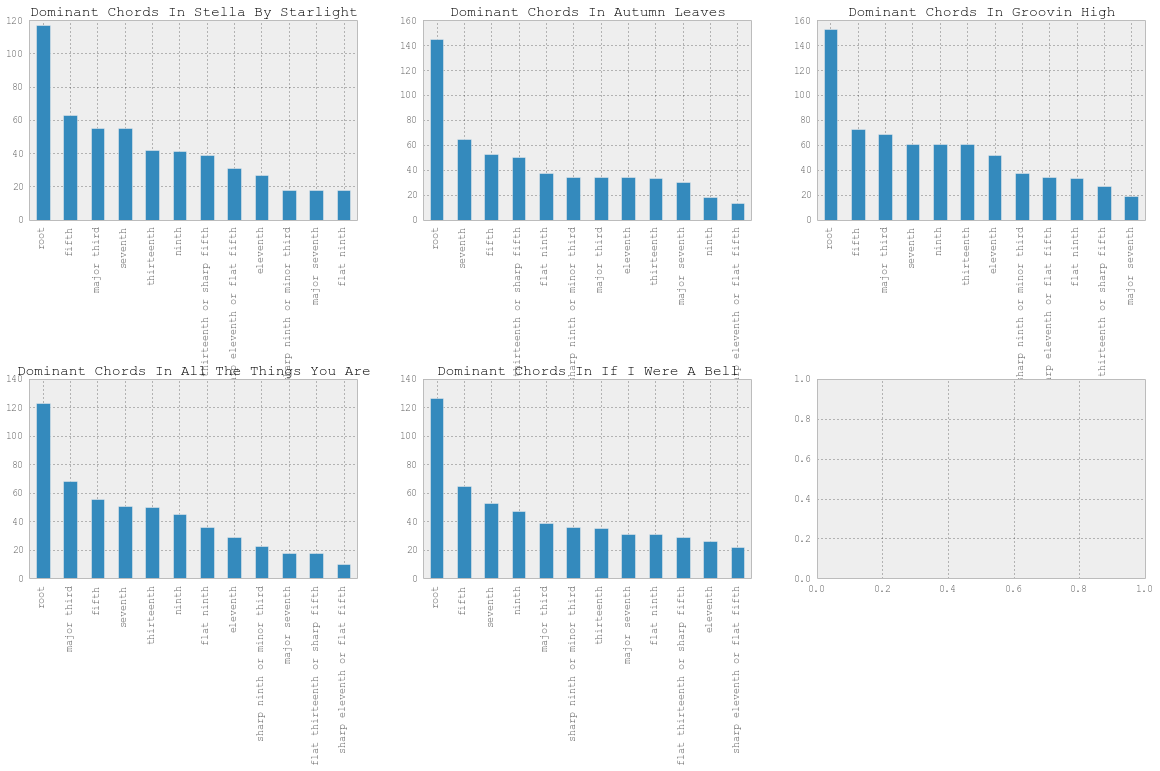

In [24]:
#df1 = df[(df.a != -1) & (df.b != -1)]
fig, axes = plt.subplots(nrows=2,ncols=3)

df[(df['title'] == 'Stella By Starlight') & (df['chordTypeDisplay'] == 'dom7')]['harmonicFunctionOfNote'].value_counts().plot(kind="bar", ax=axes[0,0], figsize=(20, 10), title='Dominant Chords In Stella By Starlight')
df[(df['title'] == 'Autumn Leaves') & (df['chordTypeDisplay'] == 'dom7')]['harmonicFunctionOfNote'].value_counts().plot(kind="bar", ax=axes[0,1], figsize=(20, 10), title='Dominant Chords In Autumn Leaves')
df[(df['title'] == 'Groovin High') & (df['chordTypeDisplay'] == 'dom7')]['harmonicFunctionOfNote'].value_counts().plot(kind="bar", ax=axes[0,2], figsize=(20, 10), title='Dominant Chords In Groovin High')
df[(df['title'] == 'All The Things You Are') & (df['chordTypeDisplay'] == 'dom7')]['harmonicFunctionOfNote'].value_counts().plot(kind="bar", ax=axes[1,0], figsize=(20, 10), title='Dominant Chords In All The Things You Are')
df[(df['title'] == 'If I Were A Bell') & (df['chordTypeDisplay'] == 'dom7')]['harmonicFunctionOfNote'].value_counts().plot(kind="bar", ax=axes[1,1], figsize=(20, 10), title='Dominant Chords In If I Were A Bell')
subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.8)

left  = 0.125  # the left side of the subplots of the figure
right = 0.9    # the right side of the subplots of the figure
bottom = 0.3   # the bottom of the subplots of the figure
top = 2      # the top of the subplots of the figure
wspace = 0.2   # the amount of width reserved for blank space between subplots
hspace = 2   # the amount of height reserved for white space between subplots

<div>However the root is not played more often, it occurs in come kind of context. It is proceeded by paritcular notes, and followed by other notes is key here. but how is it behaving. The root doesn't just appear as a statistically most common note - it is rather quiet different, it is driven what happens before and what happens afterw which is a questions</div>

<div>So how is the root prepared, in terms of voice leading</div>

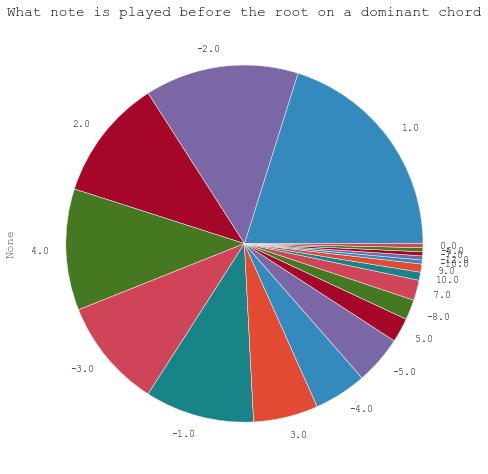

In [25]:
df[(df['part'] == 'P1') &(df['harmonicFunctionOfNote'] == 'root') & (df['chordTypeDisplay'] == 'dom7')]['prevNoteFreqDistance'].value_counts().plot(kind="pie", figsize=(8,8), title='What note is played before the root on a dominant chord')

<div>Overall, the use of the root chord is very structured, over 50 percent of cases, there are ony 4 possible note shtat come before it. Some of this is the predominance in tones and semitones, use of a major third how does each note  in terms of the various solos </div>

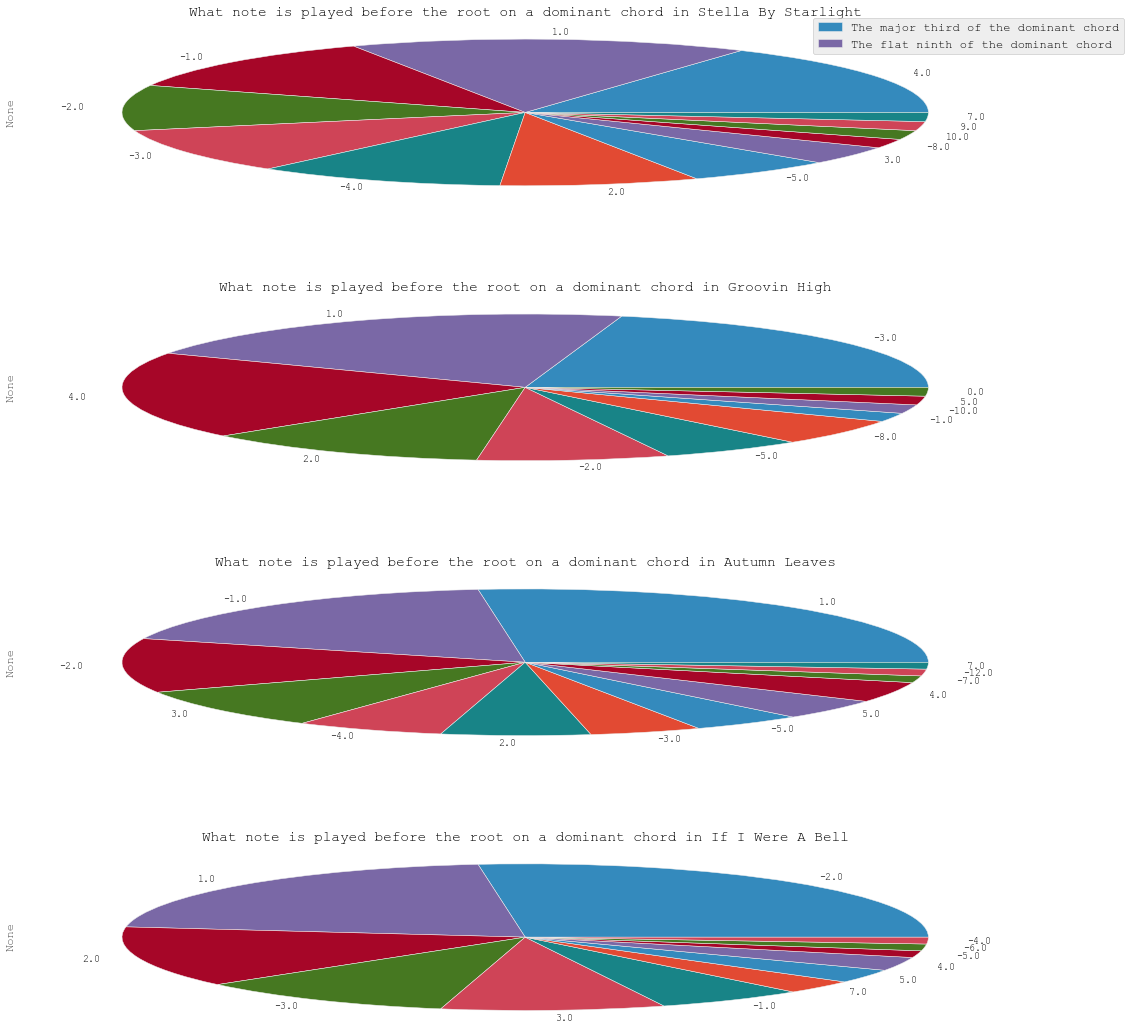

In [26]:
fig, axes = plt.subplots(nrows=4,ncols=1)

df[(df['part'] == 'P1') & (df['title'] == 'Stella By Starlight') & (df['harmonicFunctionOfNote'] == 'root') & (df['chordTypeDisplay'] == 'dom7')]['prevNoteFreqDistance'].value_counts().plot(kind="pie", figsize=(7,7), ax=axes[0], title='What note is played before the root on a dominant chord in Stella By Starlight')
df[(df['part'] == 'P1') & (df['title'] == 'Groovin High') & (df['harmonicFunctionOfNote'] == 'root') & (df['chordTypeDisplay'] == 'dom7')]['prevNoteFreqDistance'].value_counts().plot(kind="pie", figsize=(7,7), ax=axes[1], title='What note is played before the root on a dominant chord in Groovin High')
df[(df['part'] == 'P1') & (df['title'] == 'Autumn Leaves') & (df['harmonicFunctionOfNote'] == 'root') & (df['chordTypeDisplay'] == 'dom7')]['prevNoteFreqDistance'].value_counts().plot(kind="pie", figsize=(7,7), ax=axes[2], title='What note is played before the root on a dominant chord in Autumn Leaves')
df[(df['part'] == 'P1') & (df['title'] == 'If I Were A Bell') & (df['harmonicFunctionOfNote'] == 'root') & (df['chordTypeDisplay'] == 'dom7')]['prevNoteFreqDistance'].value_counts().plot(kind="pie", figsize=(7,7), ax=axes[3], title='What note is played before the root on a dominant chord in If I Were A Bell')

axes[0].legend(['The major third of the dominant chord', 'The flat ninth of the dominant chord'])

axes[0].legend(['The major third of the dominant chord', 'The flat ninth of the dominant chord'],bbox_to_anchor=(1.1, 1.05))

left  = 1.0  # the left side of the subplots of the figure
right = 3.0    # the right side of the subplots of the figure
bottom = 1.0   # the bottom of the subplots of the figure
top = 3.0      # the top of the subplots of the figure
wspace = 0   # the amount of width reserved for blank space between subplots
hspace = 0   # the amount of height reserved for white space between subplots

subplots_adjust(left=left, bottom=bottom, right=right, top=top, wspace=None, hspace=None)



<div>This unusual. It it more to do with progression, or chord minor or major, challenges play on a dominant chord, but says that dominant chords appear to be treated differently depening on the overall song. But as a musicin this seems counter inutivie It suggests that it is not the full story. constrain results to V I and include tonality of minor or major. So good idea to look at</div>
<div>Limit the dominant chords under consideration here, to just those V of a major chord, (such as G7 moving to C major). As opposed to G dom7 leading to F# minor 7 b5</div>

<div>Perhaps a deeper quesion to ask is to keep in mind the nature of the progression - take into account these progression, before examining the voice leading, to locate them in progressions</div>

In [27]:
dfV_IMinAllDegrees = df[(df['part'] == 'P1') &(df['chordTypeDisplay'] == 'dom7') &(df['veryNextChordType'] == 'min7') & (df['veryNextChordRootAsInt'] == 5) ]

In [28]:
dfV_IMinAllDegrees['harmonicFunctionOfNote'].value_counts()

root                              140
fifth                             112
seventh                           107
major third                        96
flat thirteenth or sharp fifth     92
sharp ninth or minor third         75
flat ninth                         70
thirteenth                         67
eleventh                           59
ninth                              52
major seventh                      47
sharp eleventh or flat fifth       38
dtype: int64

In [29]:
dfV_IMajAllDegrees = df[(df['part'] == 'P1') &(df['chordTypeDisplay'] == 'dom7') &(df['veryNextChordType'] == 'maj7') & (df['veryNextChordRootAsInt'] == 5) ]

In [30]:
dfV_IMajAllDegrees['harmonicFunctionOfNote'].value_counts()

major third                       87
seventh                           84
fifth                             78
thirteenth                        75
root                              72
ninth                             60
flat ninth                        52
eleventh                          43
sharp ninth or minor third        33
major seventh                     28
flat thirteenth or sharp fifth    27
sharp eleventh or flat fifth      21
dtype: int64

In [31]:
dfV_IMinJustRoot = df[(df['part'] == 'P1') &(df['harmonicFunctionOfNote'] == 'root') &(df['chordTypeDisplay'] == 'dom7') &(df['veryNextChordType'] == 'min7') & (df['veryNextChordRootAsInt'] == 5) ]

<div>So Note choice is affected by the chord that comes after dominant chord and heavily so. Question to ask is what happens to root note on a dominant chord when it is minor progression</div>

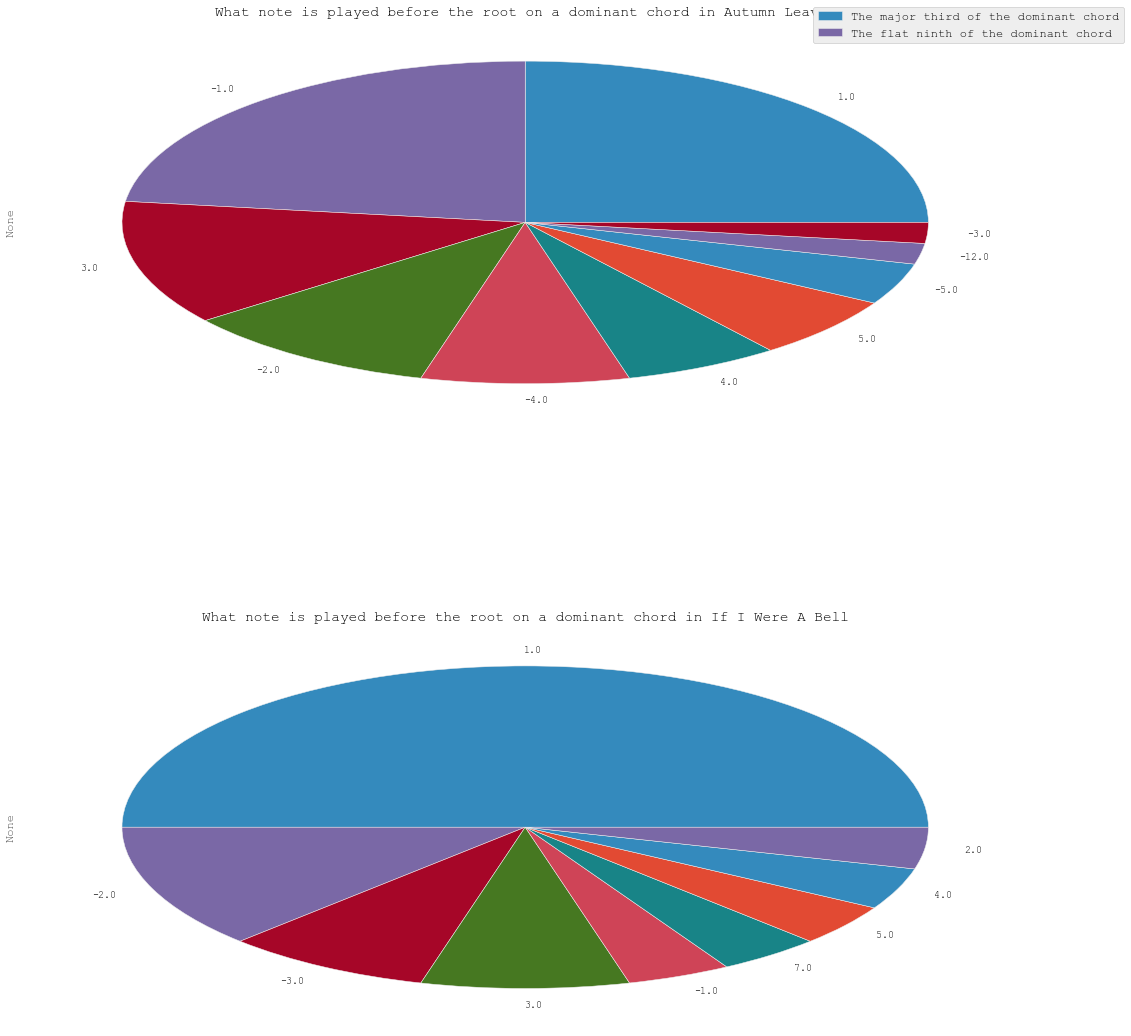

In [32]:
fig, axes = plt.subplots(nrows=2,ncols=1)

dfV_IMinJustRoot[dfV_IMinJustRoot['title'] == 'Autumn Leaves']['prevNoteFreqDistance'].value_counts().plot(kind="pie", figsize=(7,7), ax=axes[0], title='What note is played before the root on a dominant chord in Autumn Leaves')
dfV_IMinJustRoot[dfV_IMinJustRoot['title'] == 'If I Were A Bell']['prevNoteFreqDistance'].value_counts().plot(kind="pie", figsize=(7,7), ax=axes[1], title='What note is played before the root on a dominant chord in If I Were A Bell')


axes[0].legend(['The major third of the dominant chord', 'The flat ninth of the dominant chord'],bbox_to_anchor=(1.1, 1.05))

left  = 1.0  # the left side of the subplots of the figure
right = 3.0    # the right side of the subplots of the figure
bottom = 1.0   # the bottom of the subplots of the figure
top = 3.0      # the top of the subplots of the figure
wspace = 0   # the amount of width reserved for blank space between subplots
hspace = 0   # the amount of height reserved for white space between subplots

subplots_adjust(left=left, bottom=bottom, right=right, top=top, wspace=None, hspace=None)


<div>Look at some examples</div>

In [33]:
#dfV_Imin[(dfV_Imin['title'] == 'If I Were A Bell') &(dfV_Imin['prevNoteFreqDistance'] == 1)]

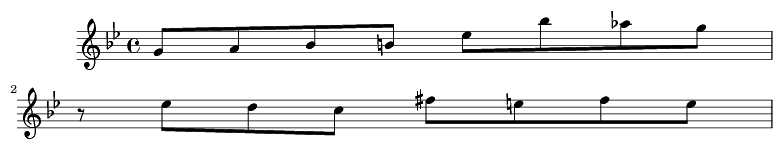

In [34]:
#Ab going to the G
select = muAutumnLeaves.parts[0].measures(20,21)
select.show()

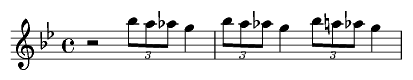

In [35]:
#Ab going to G
select = muAutumnLeaves.parts[0].measures(72,73)
select.show()

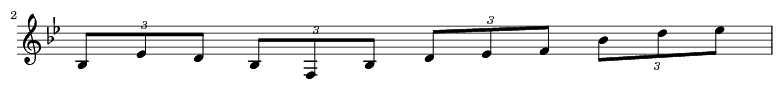

In [36]:
#Eb going to D
select = muAutumnLeaves.parts[0].measures(158,159)
select.show()

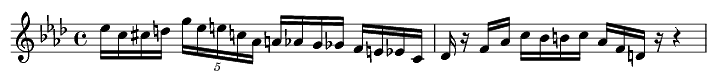

In [37]:
#Gb going to an F in a similiar fashion. 
select = muIfIWereABell.parts[0].measures(73,74)
select.show()

<div>What this suggests, the thesis here, is that Jarrett always produces variation, but taking two isolated notes out shows that there is structure - a tendency for the root to be predominant, and a tendency for it to preceeded by a the flat ningth when it is in a minor progression. An alternate way of saying this is that if there is a 44% chance a dominant chord will be occuring. if this is the case, a dom chord is occuring, there is 44% chance that root note will be played. If this occurs, flat ninth. In terms of all the data set, tells us little, but behaviour modified level it says something really definitive is happening</div>

<div>This goes to the heart of the issue, lots information, tells with great granularity how this chord is behaving. The following chapter will go into more depth of the problem of informatin this presents. essentially this is a case study approach</div>

<div>What about afterward the root note plays, what is happening, limit only to Autumn leaves </div>

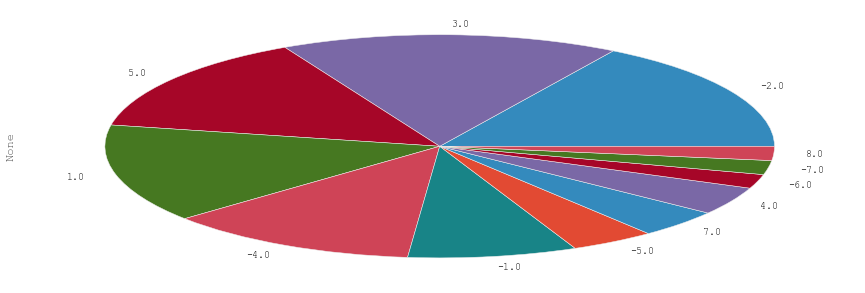

In [43]:
dfV_IMinJustRoot[dfV_IMinJustRoot['title'] == 'Autumn Leaves']['nextNoteFreqDistance'].value_counts().plot(kind="pie")

<div>This says that D dominant seventh, to put into contect, d note most ofent F, C, a G, Eb, C# etc</div>

In [52]:
dfV_IMinJustRoot[(dfV_IMinJustRoot['title'] == 'Autumn Leaves') & (dfV_IMinJustRoot['nextNoteFreqDistance'] == 5)]


chordDisplayName restFlag  performerName  composerName genre  numberOfParts          title yearOfComposition yearOfPerformance  ongoingTempo part  quarterNoteDuration  midiNumber noteDisplayName noteDisplayNameNoOctave  nextNoteFreqDistance  prevNoteFreqDistance normalisedFrequencies normalisedFrequenciesNoOctave  noteEventLocation  noteEventStartingLocation  measure  Location in measure  chordRootAsInt  chordTypeAsInt  chordBassAsInt chordTypeDisplay  distanceFromNoteToChordRoot distanceFromNoteToChordBass harmonicFunctionOfNote                                      nextTenChords                                  nextTenChordTypes veryNextChordType  veryNextChordRootAsInt
126            D dom7     note  Keith Jarrett  Joseph Kosma  jazz              2  Autumn Leaves              1943              2002           120   P1                  0.5          50              D4                       D                     5                    -2                    D4                             D              71.48                      70.98       18                 2.98               2             NaN              -1             dom7                            0                        None                   root  [7.0, 0.0, 5.0, 10.0, 3.0, 9.0, 2.0, 7.0, 5.0,...  [min7, dom7, min7, dom7, maj7, min7b5, dom7, m...              min7                       5
191            D dom7     note  Keith Jarrett  Joseph Kosma  jazz              2  Autumn Leaves              1943              2002           120   P1                  0.5          50              D4                       D                     5                    -4                    D4                             D             102.98                     102.48       26                 2.48               2             NaN              -1             dom7                            0                        None                   root  [7.0, 5.0, 3.0, 2.0, 7.0, 0.0, 5.0, 10.0, 3.0,...  [min7, dom7, maj7, dom7, min7, dom7, min7, dom...              min7                       5
441            D dom7     note  Keith Jarrett  Joseph Kosma  jazz              2  Autumn Leaves              1943              2002           120   P1                  0.5          62              D5                       D                     5                    -1                    D5                             D             228.91                     228.41       58                 0.41               2             NaN              -1             dom7                            0                        None                   root  [7.0, 5.0, 3.0, 2.0, 7.0, 0.0, 5.0, 10.0, 3.0,...  [min7, dom7, maj7, dom7, min7, dom7, min7, dom...              min7                       5
543            D dom7     note  Keith Jarrett  Joseph Kosma  jazz              2  Autumn Leaves              1943              2002           120   P1                  0.5          62              D5                       D                     5                    -2                    D5                             D             279.40                     278.90       70                 2.90               2             NaN              -1             dom7                            0                        None                   root  [7.0, 0.0, 5.0, 10.0, 3.0, 9.0, 2.0, 7.0, 9.0,...  [min7, dom7, min7, dom7, maj7, min7b5, dom7, m...              min7                       5
650            D dom7     note  Keith Jarrett  Joseph Kosma  jazz              2  Autumn Leaves              1943              2002           120   P1                  0.5          50              D4                       D                     5                   NaN                    D4                             D             327.70                     327.20       82                 3.20               2             NaN              -1             dom7                            0                        None                   root  [7.0, 0.0, 5.0, 10.0, 3.0, 9.0, 2.0, 7

<div>really seeing similiartity here</div>

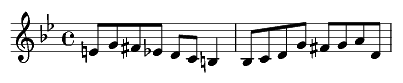

In [54]:
#D going to G
select = muAutumnLeaves.parts[0].measures(18,19)
select.show()

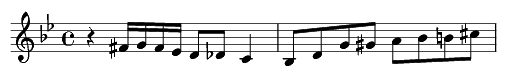

In [55]:
select = muAutumnLeaves.parts[0].measures(26,27)
select.show()

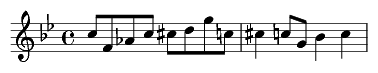

In [56]:
select = muAutumnLeaves.parts[0].measures(58,59)
select.show()

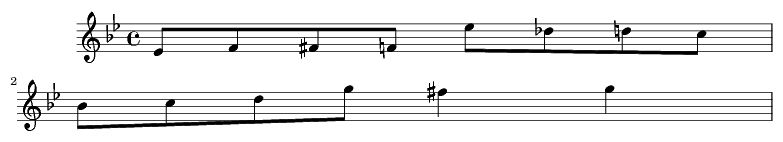

In [57]:
select = muAutumnLeaves.parts[0].measures(70,71)
select.show()

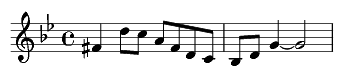

In [58]:
select = muAutumnLeaves.parts[0].measures(142,143)
select.show()

In [9]:
dfV_IMinJustFifth = df[(df['part'] == 'P1') &(df['harmonicFunctionOfNote'] == 'fifth') &(df['chordTypeDisplay'] == 'dom7') &(df['veryNextChordType'] == 'min7') & (df['veryNextChordRootAsInt'] == 5) ]

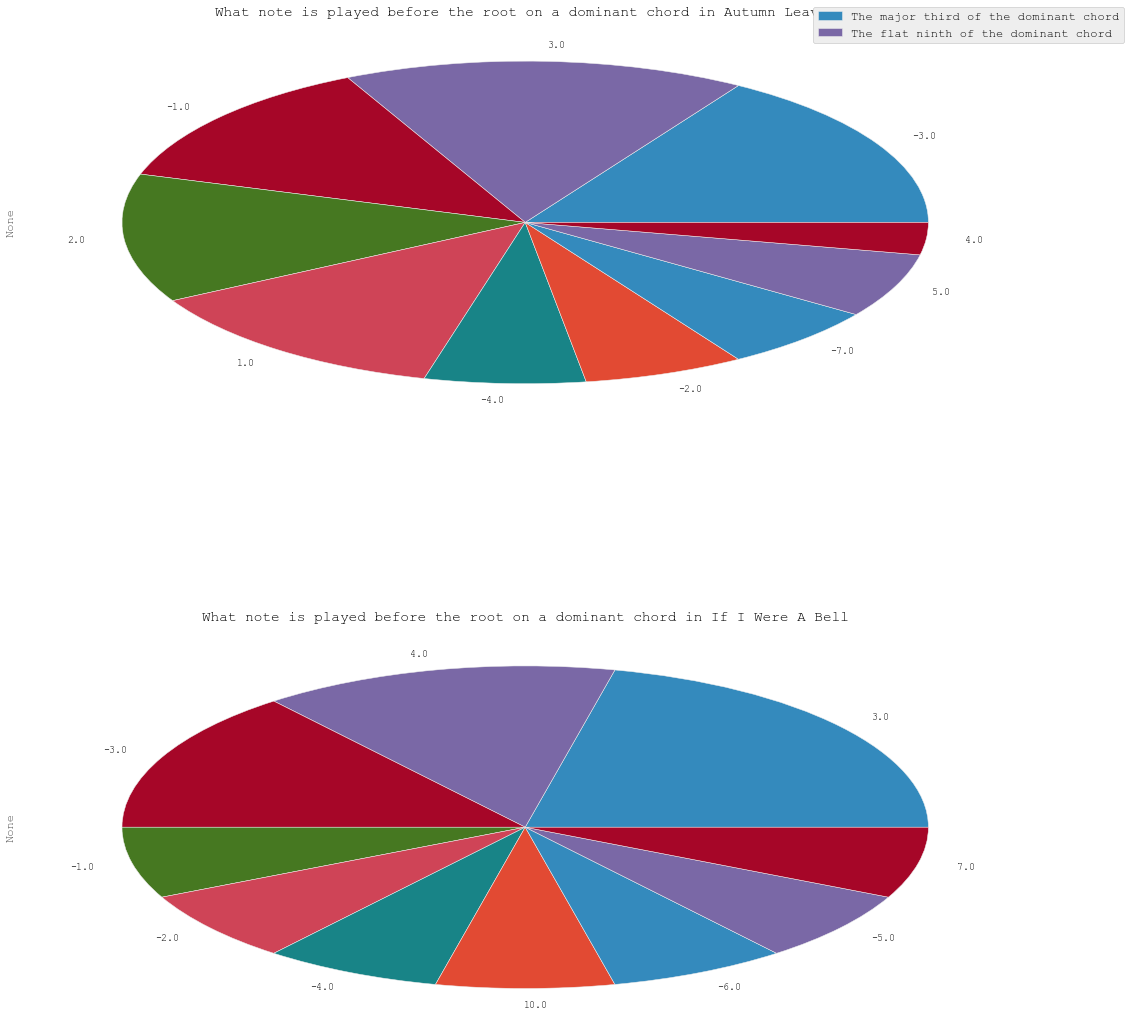

In [32]:
fig, axes = plt.subplots(nrows=2,ncols=1)

dfV_IMinJustFifth[dfV_IMinJustFifth['title'] == 'Autumn Leaves']['prevNoteFreqDistance'].value_counts().plot(kind="pie", figsize=(7,7), ax=axes[0], title='What note is played before the root on a dominant chord in Autumn Leaves')
dfV_IMinJustFifth[dfV_IMinJustFifth['title'] == 'If I Were A Bell']['prevNoteFreqDistance'].value_counts().plot(kind="pie", figsize=(7,7), ax=axes[1], title='What note is played before the root on a dominant chord in If I Were A Bell')


axes[0].legend(['The major third of the dominant chord', 'The flat ninth of the dominant chord'],bbox_to_anchor=(1.1, 1.05))

left  = 1.0  # the left side of the subplots of the figure
right = 3.0    # the right side of the subplots of the figure
bottom = 1.0   # the bottom of the subplots of the figure
top = 3.0      # the top of the subplots of the figure
wspace = 0   # the amount of width reserved for blank space between subplots
hspace = 0   # the amount of height reserved for white space between subplots

subplots_adjust(left=left, bottom=bottom, right=right, top=top, wspace=None, hspace=None)

<div> Its possible to go through all and in the hte next chpater - but establishes a case that each note has certain tendencies JG _ GO through the ROOT, FIFTH AND SEVENTH TO SEE HOW THEY ARE BEHAVING, CONSTRUCT VOICE LEADING SHENKER STYLE</div>

<div>But it gets exhaustive to go through this process, but it establishes that there is deep structure here, not driven by sets of notes, but behavious at certain points </div>

In [18]:
# note0 = mu.note.Note("F5")
# note0.duration.type = 'half'
# note1 = mu.note.Note("C4")
# note1.duration.type = 'eighth'
# note2 = mu.note.Note("F#4")

# streamOne = mu.stream.Stream()
# streamOne.append(note0)
# streamOne.append(note1)
# streamOne.append(note2)

In [19]:
#streamOne.show()

In [64]:
x = df.groupby('chordDisplayName')

In [71]:
x = df

In [74]:
x.head()

chordDisplayName restFlag  performerName  composerName genre  numberOfParts                title yearOfComposition yearOfPerformance  ongoingTempo part  quarterNoteDuration  midiNumber noteDisplayName noteDisplayNameNoOctave  nextNoteFreqDistance  prevNoteFreqDistance normalisedFrequencies normalisedFrequenciesNoOctave  noteEventLocation  noteEventStartingLocation  measure  Location in measure  chordRootAsInt  chordTypeAsInt  chordBassAsInt chordTypeDisplay  distanceFromNoteToChordRoot distanceFromNoteToChordBass      harmonicFunctionOfNote                                      nextTenChords                                  nextTenChordTypes veryNextChordType  veryNextChordRootAsInt
0         E min7b5     note  Keith Jarrett  Victor Young  jazz              2  Stella By Starlight              1943              1983           120   P2                  4.0          52              E4                       E                    -7                   NaN                    E4                             E                4.0                        0.0        1                  0.0               4               7              -1           min7b5                            0                        None                        root  [9.0, 0.0, 5.0, 10.0, 3.0, 8.0, 10.0, 4.0, 2.0...  [dom7, min7, dom7, min7, dom7, maj7, dom7, maj...              dom7                       5
1         E min7b5     note  Keith Jarrett  Victor Young  jazz              2  Stella By Starlight              1943              1983           120   P1                  0.5          55              G4                       G                   NaN                   NaN                    G4                             G                0.5                        0.0        1                  0.0               4             NaN              -1           min7b5                            3                        None  sharp ninth or minor third  [9.0, 0.0, 5.0, 10.0, 3.0, 8.0, 10.0, 4.0, 2.0...  [dom7, min7, dom7, min7, dom7, maj7, dom7, maj...              dom7                       5
2         E min7b5     rest  Keith Jarrett  Victor Young  jazz              2  Stella By Starlight              1943              1983           120   P1                  0.5         NaN        NoneNone                    None                   NaN                   NaN                  None                          None                1.0                        0.5        1                  0.5               4             NaN              -1           min7b5                          NaN                        None                         NaN  [9.0, 0.0, 5.0, 10.0, 3.0, 8.0, 10.0, 4.0, 2.0...  [dom7, min7, dom7, min7, dom7, maj7, dom7, maj...              dom7                       5
3         E min7b5     rest  Keith Jarrett  Victor Young  jazz              2  Stella By Starlight              1943              1983           120   P1                  0.5         NaN        NoneNone                    None                   NaN                   NaN                  None                          None                1.5                        1.0        1                  1.0               4             NaN              -1           min7b5                          NaN                        None                         NaN  [9.0, 0.0, 5.0, 10.0, 3.0, 8.0, 10.0, 4.0, 2.0...  [dom7, min7, dom7, min7, dom7, maj7, dom7, maj...              dom7                       5
4         E min7b5     note  Keith Jarrett  Victor Young  jazz              2  Stella By Starlight              1943              1983           120   P1                  0.5          57              A4                       A                     1                   NaN                    A4                             A                2.0                        1.5        1                  1.5               4             NaN              -1           min7b5                            5                        None                 

In [100]:
a = x.set_index(['chordDisplayName', 'yearOfPerformance', 'restFlag', 'composerName'])

In [116]:
pd.melt(a)

variable          value
0                performerName  Keith Jarrett
1                performerName  Keith Jarrett
2                performerName  Keith Jarrett
3                performerName  Keith Jarrett
4                performerName  Keith Jarrett
5                performerName  Keith Jarrett
6                performerName  Keith Jarrett
7                performerName  Keith Jarrett
8                performerName  Keith Jarrett
9                performerName  Keith Jarrett
10               performerName  Keith Jarrett
11               performerName  Keith Jarrett
12               performerName  Keith Jarrett
13               performerName  Keith Jarrett
14               performerName  Keith Jarrett
15               performerName  Keith Jarrett
16               performerName  Keith Jarrett
17               performerName  Keith Jarrett
18               performerName  Keith Jarrett
19               performerName  Keith Jarrett
20               performerName  Keith Jarrett
21               performerName  Keith Jarrett
22               performerName  Keith Jarrett
23               performerName  Keith Jarrett
24               performerName  Keith Jarrett
25               performerName  Keith Jarrett
26               performerName  Keith Jarrett
27               performerName  Keith Jarrett
28               performerName  Keith Jarrett
29               performerName  Keith Jarrett
...                        ...            ...
311460  veryNextChordRootAsInt            NaN
311461  veryNextChordRootAsInt            NaN
311462  veryNextChordRootAsInt            NaN
311463  veryNextChordRootAsInt            NaN
311464  veryNextChordRootAsInt            NaN
311465  veryNextChordRootAsInt            NaN
311466  veryNextChordRootAsInt            NaN
311467  veryNextChordRootAsInt            NaN
311468  veryNextChordRootAsInt            NaN
311469  veryNextChordRootAsInt            NaN
311470  veryNextChordRootAsInt            NaN
311471  veryNextChordRootAsInt            NaN
311472  veryNextChordRootAsInt            NaN
311473  veryNextChordRootAsInt            NaN
311474  veryNextChordRootAsInt            NaN
311475  veryNextChordRootAsInt            NaN
311476  veryNextChordRootAsInt            NaN
311477  veryNextChordRootAsInt            NaN
311478  veryNextChordRootAsInt            NaN
311479  veryNextChordRootAsInt            NaN
311480  veryNextChordRootAsInt            NaN
311481  veryNextChordRootAsInt            NaN
311482  veryNextChordRootAsInt            NaN
311483  veryNextChordRootAsInt            NaN
311484  veryNextChordRootAsInt            NaN
311485  veryNextChordRootAsInt            NaN
311486  veryNextChordRootAsInt            NaN
311487  veryNextChordRootAsInt            NaN
311488  veryNextChordRootAsInt            NaN
311489  veryNextChordRootAsInt            NaN

[311490 rows x 2 columns]

In [109]:
c = pd.read_csv('test.csv')

In [112]:
df.describe()

numberOfParts  ongoingTempo  quarterNoteDuration   midiNumber  nextNoteFreqDistance  prevNoteFreqDistance  noteEventLocation  noteEventStartingLocation       measure  Location in measure  chordRootAsInt  chordTypeAsInt  chordBassAsInt  distanceFromNoteToChordRoot  veryNextChordRootAsInt
count          10383         10383         10378.000000  9105.000000           8683.000000           8683.000000       10378.000000               10383.000000  10383.000000         10383.000000    10383.000000     1347.000000           10383                  9105.000000             9812.000000
mean               2           120             1.102966    56.534981             -0.056662              0.056662         521.664204                 520.861266    130.766253             1.308151        5.364923        1.775798              -1                     4.700494                6.035263
std                0             0             1.292433     7.058607              3.700398              3.700398         325.651356                 325.623839     81.425667             1.441124        3.445370        2.166250               0                     3.676510                2.539742
min                2           120             0.080000    34.000000            -20.000000            -17.000000           0.500000                   0.000000      1.000000            -1.000000        0.000000        0.000000              -1                     0.000000                1.000000
25%                2           120             0.500000    51.000000             -2.000000             -3.000000         267.137500                 266.390000     67.000000             0.000000        3.000000        0.000000              -1                     1.000000                5.000000
50%                2           120             0.500000    56.000000              0.000000              0.000000         489.080000                 488.540000    123.000000             1.130000        5.000000        1.000000              -1                     4.000000                5.000000
75%                2           120             1.000000    62.000000              3.000000              2.000000         744.797500                 744.000000    187.000000             2.480000        8.000000        2.000000              -1                     8.000000                7.000000
max                2           120             6.000000    77.000000             17.000000             20.000000        1601.940000                1600.000000    401.000000             4.000000       11.000000        7.000000              -1                    11.000000               11.000000

In [95]:
import json

In [97]:
b[0:3000]

'[{"restFlag":"note","performerName":"Keith Jarrett","composerName":"Victor Young","genre":"jazz","numberOfParts":2,"title":"Stella By Starlight","yearOfComposition":"1943","ongoingTempo":120,"part":"P2","quarterNoteDuration":4.0,"midiNumber":52.0,"noteDisplayName":"E4","noteDisplayNameNoOctave":"E","nextNoteFreqDistance":-7.0,"prevNoteFreqDistance":null,"normalisedFrequencies":"E4","normalisedFrequenciesNoOctave":"E","noteEventLocation":4.0,"noteEventStartingLocation":0.0,"measure":1.0,"Location in measure":0.0,"chordRootAsInt":4.0,"chordTypeAsInt":7.0,"chordBassAsInt":-1.0,"chordTypeDisplay":"min7b5","distanceFromNoteToChordRoot":0.0,"distanceFromNoteToChordBass":null,"harmonicFunctionOfNote":"root","nextTenChords":[9.0,0.0,5.0,10.0,3.0,8.0,10.0,4.0,2.0,10.0],"nextTenChordTypes":["dom7","min7","dom7","min7","dom7","maj7","dom7","maj7","min7b5","min7"],"veryNextChordType":"dom7","veryNextChordRootAsInt":5.0},{"restFlag":"note","performerName":"Keith Jarrett","composerName":"Victor You